In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings

%matplotlib inline

In [2]:
df = pd.read_csv("Travel.csv")
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [3]:
## Data Cleaning
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [4]:
df['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [5]:
df['TypeofContact'].value_counts()

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

In [6]:
df['Gender'] = df['Gender'].replace('Fe Male', 'Female')
df['MaritalStatus'] = df['MaritalStatus'].replace('Single', 'Umarried')

In [7]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Umarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Umarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [8]:
## Check Missing Value
features_with_na =[features for features in df.columns if df[features].isnull().sum()>=1]
for feature in features_with_na:
    print(feature,np.round(df[feature].isnull().mean()*100,5), '%missing values')

Age 4.62357 %missing values
TypeofContact 0.51146 %missing values
DurationOfPitch 5.13502 %missing values
NumberOfFollowups 0.92062 %missing values
PreferredPropertyStar 0.53191 %missing values
NumberOfTrips 2.86416 %missing values
NumberOfChildrenVisiting 1.35025 %missing values
MonthlyIncome 4.76678 %missing values


In [9]:
df[features_with_na].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


In [10]:
## Age
df.Age.fillna(df.Age.median(), inplace=True)

## Typesofcontract
df.TypeofContact.fillna(df.TypeofContact.mode()[0], inplace= True)

# Durationofpitch
df.DurationOfPitch.fillna(df.DurationOfPitch.median(), inplace=True)

# Numberoffolloups
df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode()[0], inplace=True)

## PreferredPropertyStar
df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0], inplace=True)

## NumbetOfTrips
df.NumberOfTrips.fillna(df.NumberOfTrips.median(), inplace=True)

##NumberofChildrenvisiting
df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode()[0], inplace=True)

## MOnthlyIncome
df.MonthlyIncome.fillna(df.MonthlyIncome.median(), inplace=True)

C:\Users\ACER\AppData\Local\Temp\ipykernel_10748\1965219584.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Age.fillna(df.Age.median(), inplace=True)
C:\Users\ACER\AppData\Local\Temp\ipykernel_10748\1965219584.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

In [11]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Umarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Umarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [12]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [13]:
df.drop('CustomerID', inplace=True, axis=1)

Feature Enginnering

In [14]:
## Create a new column for feature
df['TotalVisiting'] =df['NumberOfPersonVisiting'] + df['NumberOfChildrenVisiting']
df.drop(columns=['NumberOfPersonVisiting', 'NumberOfChildrenVisiting'], inplace=True)

In [15]:
## Get all the numeric Features
num_features =[feature for feature in df.columns if df[feature].dtype != 'O']
print("Num of NUmerical Feature :", len(num_features))

Num of NUmerical Feature : 12


In [16]:
## Categorical Features
categorical_features = [feature for feature in df.columns if df[feature].dtype =='O']
print("Num of Categorical Features :", len(categorical_features))

Num of Categorical Features : 6


In [17]:
## Discrete Features
discrete_features = [features_with_na for feature in num_features if len(df[feature].unique()<=25)]
print("Discrete Feature :", len(discrete_features))

Discrete Feature : 12


In [18]:
## Continuous Features
continuos_features = [feature for feature in num_features if feature not in discrete_features]
print("Continues Featurs :", len(continuos_features))

Continues Featurs : 12


Train Test Split And Model Training

In [19]:
from sklearn.model_selection import train_test_split
X = df.drop(['ProdTaken'], axis=1)
y =df['ProdTaken']

In [20]:
y.value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

In [21]:
X.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Umarried,1.0,1,2,1,Manager,20993.0,3.0
1,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Umarried,7.0,1,3,0,Executive,17090.0,3.0
3,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [23]:
X_train.shape, X_test.shape

((3910, 17), (978, 17))

In [24]:
## Create Column Transfer with 3 types of transformers

cat_features = X.select_dtypes(include="object").columns
num_features = X.select_dtypes(exclude="object").columns



In [25]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_trasformer = OneHotEncoder(drop='first')

preprossor =ColumnTransformer(
    [
        ("OneHotEncoder", oh_trasformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)

In [26]:
X_train =preprossor.fit_transform(X_train)
X_test =preprossor.transform(X_test)

In [27]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,-1.020350,1.284279,-0.725271,-0.127737,-0.632399,0.679690,0.782966,-0.382245,-0.774151
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,-0.721400,0.690023,0.282777,-0.725271,1.511598,-0.632399,0.679690,0.782966,-0.459799,0.643615
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,-1.020350,0.282777,1.771041,0.418708,-0.632399,0.679690,0.782966,-0.245196,-0.065268
3,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,-0.721400,-1.020350,1.284279,-0.725271,-0.127737,-0.632399,1.408395,-1.277194,0.213475,-0.065268
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,2.400396,-1.720227,-0.725271,1.511598,-0.632399,-0.049015,-1.277194,-0.024889,2.061382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,-0.653841,1.284279,-0.725271,-0.674182,-0.632399,-1.506426,0.782966,-0.536973,0.643615
3906,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.455047,-0.898180,-0.718725,1.771041,-1.220627,-0.632399,1.408395,0.782966,1.529609,-0.065268
3907,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.455047,1.545210,0.282777,-0.725271,2.058043,-0.632399,-0.777720,0.782966,-0.360576,0.643615
3908,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.455047,1.789549,1.284279,-0.725271,-0.127737,-0.632399,-1.506426,0.782966,-0.252799,0.643615


In [28]:
pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.455047,-0.287333,1.284279,-0.725271,-1.220627,-0.632399,-0.777720,-1.277194,-0.737510,-0.774151
1,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.366823,-0.531672,0.282777,0.522885,-1.220627,1.581280,1.408395,-1.277194,-0.670411,-0.065268
2,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.455047,0.812193,0.282777,-0.725271,0.965153,-0.632399,1.408395,0.782966,-0.420832,-0.774151
3,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,-0.721400,2.522566,2.285781,-0.725271,1.511598,-0.632399,-0.049015,0.782966,-0.113658,0.643615
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.455047,-1.020350,0.282777,0.522885,-0.127737,1.581280,0.679690,0.782966,-0.317047,2.061382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.721400,-1.020350,0.282777,-0.725271,1.511598,-0.632399,1.408395,0.782966,0.498219,0.643615
974,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.721400,-1.142519,0.282777,1.771041,-0.674182,1.581280,-1.506426,-1.277194,-1.184015,-1.483035
975,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,-0.721400,1.056532,1.284279,-0.725271,-0.674182,1.581280,1.408395,0.782966,0.690012,0.643615
976,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,-0.287333,-2.721728,-0.725271,-0.674182,-0.632399,1.408395,0.782966,-0.228278,-0.774151


# Random Forest Classifier Training

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,precision_score,recall_score,f1_score,roc_auc_score,roc_curve

In [30]:

models ={
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest ": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Adaboost": AdaBoostClassifier(),
}

for i in range(len(list(models))):
    model =list(models.values())[i]
    model.fit(X_train,y_train)  ## Train Model

    ## make prediction
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    ## Training Set Performance
    model_train_accuracy = accuracy_score(y_train,y_train_pred)
    model_train_f1 = f1_score(y_train,y_train_pred, average='weighted')
    model_train_precision = precision_score(y_train, y_train_pred)
    model_train_recall =recall_score(y_train, y_train_pred)
    model_train_rocauc_score =roc_auc_score(y_train,y_train_pred)


    ## Test Set Performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 =f1_score(y_test, y_test_pred)
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall =recall_score(y_test, y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)


    print(list(models.keys())[i])

    print("Model Performance For Traning Set")
    print("Accuracy :", model_train_accuracy)
    print("F1 Score :", model_train_f1)
    print("Precision :", model_train_precision)
    print("Recall :", model_train_recall)
    print("Roc Auc Score:", model_train_rocauc_score)

    print("="*35)

    print("Model Performance For Testing Set")
    print("Accuracy :", model_test_accuracy)
    print("F1 Score :", model_test_f1)
    print("Precision :", model_test_precision)
    print("Recall :", model_test_recall)
    print("Roc Auc Score:", model_test_rocauc_score)



Decision Tree
Model Performance For Traning Set
Accuracy : 1.0
F1 Score : 1.0
Precision : 1.0
Recall : 1.0
Roc Auc Score: 1.0
Model Performance For Testing Set
Accuracy : 0.9069529652351738
F1 Score : 0.7598944591029023
Precision : 0.7659574468085106
Recall : 0.7539267015706806
Roc Auc Score: 0.849009094114438
Random Forest 
Model Performance For Traning Set
Accuracy : 1.0
F1 Score : 1.0
Precision : 1.0
Recall : 1.0
Roc Auc Score: 1.0
Model Performance For Testing Set
Accuracy : 0.9171779141104295
F1 Score : 0.7395498392282959
Precision : 0.9583333333333334
Recall : 0.6020942408376964
Roc Auc Score: 0.7978705003426093
Logistic Regression
Model Performance For Traning Set
Accuracy : 0.8455242966751918
F1 Score : 0.8203491302970762
Precision : 0.6934984520123839
Recall : 0.30727023319615915
Roc Auc Score: 0.6380739723038326
Model Performance For Testing Set
Accuracy : 0.8374233128834356
F1 Score : 0.4259927797833935
Precision : 0.686046511627907
Recall : 0.3089005235602094
Roc Auc Score:

In [31]:
## Hyperparameter Tunning
rf_params = {
    "max_depth":[5,8,15,None,10],
    "max_features":[5,7,'auto',8],
    "min_samples_split":[2,8,15,20],
    "n_estimators":[100,200,500,1000]
}

In [32]:
adaboost_params = {
    "n_estimators":[50,60,70,80,90],
    "algorithm":['SAMME','SAMME.R']

}

In [33]:
## models list for Hyperparameter Tuning

randomcv_models = [
    ("RF", RandomForestClassifier(),rf_params),
    ("Adaboost", AdaBoostClassifier(), adaboost_params),
]

In [34]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}

for name,model,params in randomcv_models:
    random =RandomizedSearchCV(
        estimator=model,
        param_distributions=params,
        n_iter=100,
        cv=3,
        verbose=2,
        n_jobs=1
    )

random.fit(X_train, y_train)
model_param[name] = random.best_params_

for model_name in model_param:
    print(f"-------------Best Params For {model_name} ------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 10 candidates, totalling 30 fits


d:\All-Machine_Learning_Algorithem-Implimentation\venv\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 10 is smaller than n_iter=100. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
d:\All-Machine_Learning_Algorithem-Implimentation\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


[CV] END ...................algorithm=SAMME, n_estimators=50; total time=   0.1s
[CV] END ...................algorithm=SAMME, n_estimators=50; total time=   0.1s


d:\All-Machine_Learning_Algorithem-Implimentation\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
d:\All-Machine_Learning_Algorithem-Implimentation\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


[CV] END ...................algorithm=SAMME, n_estimators=50; total time=   0.1s


d:\All-Machine_Learning_Algorithem-Implimentation\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


[CV] END ...................algorithm=SAMME, n_estimators=60; total time=   0.1s


d:\All-Machine_Learning_Algorithem-Implimentation\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


[CV] END ...................algorithm=SAMME, n_estimators=60; total time=   0.2s


d:\All-Machine_Learning_Algorithem-Implimentation\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


[CV] END ...................algorithm=SAMME, n_estimators=60; total time=   0.1s


d:\All-Machine_Learning_Algorithem-Implimentation\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


[CV] END ...................algorithm=SAMME, n_estimators=70; total time=   0.2s


d:\All-Machine_Learning_Algorithem-Implimentation\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


[CV] END ...................algorithm=SAMME, n_estimators=70; total time=   0.2s


d:\All-Machine_Learning_Algorithem-Implimentation\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


[CV] END ...................algorithm=SAMME, n_estimators=70; total time=   0.2s


d:\All-Machine_Learning_Algorithem-Implimentation\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


[CV] END ...................algorithm=SAMME, n_estimators=80; total time=   0.3s


d:\All-Machine_Learning_Algorithem-Implimentation\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


[CV] END ...................algorithm=SAMME, n_estimators=80; total time=   0.2s


d:\All-Machine_Learning_Algorithem-Implimentation\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


[CV] END ...................algorithm=SAMME, n_estimators=80; total time=   0.2s


d:\All-Machine_Learning_Algorithem-Implimentation\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


[CV] END ...................algorithm=SAMME, n_estimators=90; total time=   0.3s


d:\All-Machine_Learning_Algorithem-Implimentation\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


[CV] END ...................algorithm=SAMME, n_estimators=90; total time=   0.2s


d:\All-Machine_Learning_Algorithem-Implimentation\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


[CV] END ...................algorithm=SAMME, n_estimators=90; total time=   0.2s
[CV] END .................algorithm=SAMME.R, n_estimators=50; total time=   0.0s
[CV] END .................algorithm=SAMME.R, n_estimators=50; total time=   0.0s
[CV] END .................algorithm=SAMME.R, n_estimators=50; total time=   0.0s
[CV] END .................algorithm=SAMME.R, n_estimators=60; total time=   0.0s
[CV] END .................algorithm=SAMME.R, n_estimators=60; total time=   0.0s
[CV] END .................algorithm=SAMME.R, n_estimators=60; total time=   0.0s
[CV] END .................algorithm=SAMME.R, n_estimators=70; total time=   0.0s
[CV] END .................algorithm=SAMME.R, n_estimators=70; total time=   0.0s
[CV] END .................algorithm=SAMME.R, n_estimators=70; total time=   0.0s
[CV] END .................algorithm=SAMME.R, n_estimators=80; total time=   0.0s
[CV] END .................algorithm=SAMME.R, n_estimators=80; total time=   0.0s
[CV] END .................al

d:\All-Machine_Learning_Algorithem-Implimentation\venv\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "d:\All-Machine_Learning_Algorithem-Implimentation\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\All-Machine_Learning_Algorithem-Implimentation\venv\Lib\site-packages\sklearn\base.py", line 1356, in wrapper
    estimator._validate_params()
  File "d:\All-Machine_Learning_Algorithem-Implimentation\venv\Lib\site-packages\sklearn\base.py

-------------Best Params For Adaboost ------------------
{'n_estimators': 60, 'algorithm': 'SAMME'}


In [ ]:
models = {

    "Random Forest":RandomForestClassifier(
        n_estimators=1000,
        min_samples_split=2,
        max_features=8,
        max_depth=15),
    "Adaboost":AdaBoostClassifier(
        n_estimators= 60, 
        algorithm= 'SAMME')

}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    ## make prediction
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    ## Training Set Performance
    model_train_accuracy = accuracy_score(y_train,y_train_pred)
    model_train_f1 = f1_score(y_train,y_train_pred, average='weighted')
    model_train_precision = precision_score(y_train, y_train_pred)
    model_train_recall =recall_score(y_train, y_train_pred)
    model_train_rocauc_score =roc_auc_score(y_train,y_train_pred)


    ## Test Set Performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 =f1_score(y_test, y_test_pred)
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall =recall_score(y_test, y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)


    print(list(models.keys())[i])

    print("Model Performance For Traning Set")
    print("Accuracy :", model_train_accuracy)
    print("F1 Score :", model_train_f1)
    print("Precision :", model_train_precision)
    print("Recall :", model_train_recall)
    print("Roc Auc Score:", model_train_rocauc_score)

    print("-"*35)

    print("Model Performance For Testing Set")
    print("Accuracy :", model_test_accuracy)
    print("F1 Score :", model_test_f1)
    print("Precision :", model_test_precision)
    print("Recall :", model_test_recall)
    print("Roc Auc Score:", model_test_rocauc_score)

    print('='*35)
    print('\n')

Random Forest
Model Performance For Traning Set
Accuracy : 0.9989769820971867
F1 Score : 0.9989758963204138
Precision : 1.0
Recall : 0.9945130315500685
Roc Auc Score: 0.9972565157750343
-----------------------------------
Model Performance For Testing Set
Accuracy : 0.9243353783231084
F1 Score : 0.7716049382716049
Precision : 0.9398496240601504
Recall : 0.6544502617801047
Roc Auc Score: 0.8221425387680701




d:\All-Machine_Learning_Algorithem-Implimentation\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


Adaboost
Model Performance For Traning Set
Accuracy : 0.8529411764705882
F1 Score : 0.8223168019801989
Precision : 0.8055555555555556
Recall : 0.2784636488340192
Roc Auc Score: 0.6315298439077358
-----------------------------------
Model Performance For Testing Set
Accuracy : 0.8374233128834356
F1 Score : 0.3614457831325301
Precision : 0.7758620689655172
Recall : 0.2356020942408377
Roc Auc Score: 0.6095418349221978




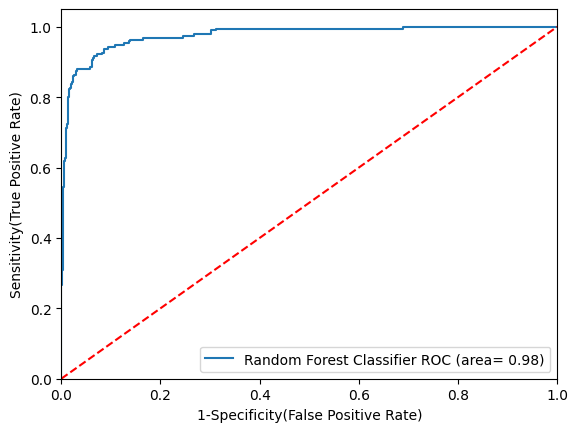

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

plt.figure()

auc_models = [
    {
        'label': 'Random Forest Classifier',
        'model': RandomForestClassifier(
            n_estimators=1000,
            min_samples_split=2,
            max_features=8,
            max_depth=15
        )
    },
]

for algo in auc_models:
    model = algo['model']
    model.fit(X_train, y_train)

    # Predict probabilities for ROC
    y_proba = model.predict_proba(X_test)[:, 1]

    # Calculate AUC
    auc_score = roc_auc_score(y_test, y_proba)

    # ROC curve points
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)

    # Plot
    plt.plot(fpr, tpr, label='%s ROC (area= %0.2f)' % (algo['label'], auc_score))

# Diagonal line
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show()